In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
from mpl_toolkits.basemap import Basemap
import datetime

In [3]:
precipitacion = Dataset('precip.mon.mean.nc','r') # Llama netCDF en modo lectura

In [4]:
print precipitacion.variables


OrderedDict([(u'lat', <type 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    actual_range: [ 88.75 -88.75]
    long_name: Latitude
    standard_name: latitude
    axis: Y
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'lon', <type 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  1.25 358.75]
    standard_name: longitude
    axis: X
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'time_bnds', <type 'netCDF4._netCDF4.Variable'>
float32 time_bnds(time, nv)
    comment: time bounds for each time value
    units: days since 1800-01-01 00:00:00 0:00
unlimited dimensions: time
current shape = (463, 2)
filling on, default _FillValue of 9.96920996839e+36 used
), (u'lat_bnds', <type 'netCDF4._netCDF4.Variable'>
float32 lat_bnds(lat, nv)
    units: degrees_north
    comment: latitude val

In [5]:
lat_values = np.array(precipitacion.variables['lat'][:])
lat_values

array([-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75, -71.25,
       -68.75, -66.25, -63.75, -61.25, -58.75, -56.25, -53.75, -51.25,
       -48.75, -46.25, -43.75, -41.25, -38.75, -36.25, -33.75, -31.25,
       -28.75, -26.25, -23.75, -21.25, -18.75, -16.25, -13.75, -11.25,
        -8.75,  -6.25,  -3.75,  -1.25,   1.25,   3.75,   6.25,   8.75,
        11.25,  13.75,  16.25,  18.75,  21.25,  23.75,  26.25,  28.75,
        31.25,  33.75,  36.25,  38.75,  41.25,  43.75,  46.25,  48.75,
        51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,  68.75,
        71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75],
      dtype=float32)

## Definición de la variables

In [6]:
ppt_dates  = np.array (precipitacion.variables['time'][:]) # En '' Nombre de las variables en el netCDF
ppt_values = np.array (precipitacion.variables['precip'][:])
lat_values = np.array (precipitacion.variables['lat'][:])
lon_values = np.array (precipitacion.variables['lon'][:])



print len(lat_values)
print len(lon_values)
print ppt_values.shape


72
144
(463, 72, 144)


### Fechas

In [7]:
fechas = []

for i in range(len(ppt_dates)):
    fechas.append(datetime.datetime(1800,01,01,0,0)+datetime.timedelta(days = ppt_dates[i]))

fechas = np.array(fechas)

### Selección de un solo mapa de toda la matriz

In [17]:
a = np.where(fechas == datetime.datetime(1993,3,1))
print a
print a[0][0]

Mapa = ppt_values[a[0][0],:,:]
print Mapa.shape

(array([170]),)
170
(72, 144)


### Selección de la serie de un pixel de toda la matriz

In [28]:
lat = np.where((lat_values > 3) & (lat_values < 9))[0]
lon = np.where((lon_values > 150) & (lon_values <160))[0]

print lat
print lon


[37 38 39]
[60 61 62 63]


In [30]:
Region = ppt_values[:,lat,:]
Region.shape

Region_Final = Region[:,:,lon]
Region_Final.shape

(463, 3, 4)

In [21]:
print lat_values[45]
print lon_values[50]
Serie = ppt_values[:,45,50]

Serie2 = ppt_values[:,0,50]

23.75
126.25


### Graficación Mapa

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


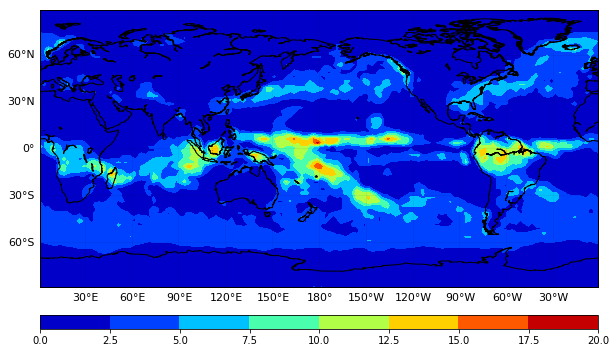

In [31]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)

# Basemap es el paquete que dibuja las líneas del mapa
m   = Basemap(llcrnrlat=np.min(lat_values),urcrnrlat=np.max(lat_values), \
              llcrnrlon=np.min(lon_values),urcrnrlon=np.max(lon_values),\
            rsphere=6371200.,resolution='l',area_thresh=10000)

ny  = lat_values.shape[0]; nx = lon_values.shape[0]
lons, lats = m.makegrid(nx, ny)
x,y = m(lons, lats)

cs  = m.contourf(x,y,Mapa,cmap='jet')

m.colorbar(location='bottom',pad="10%")

m.drawparallels(np.arange(-90.,90,30.), labels=[1,0,0,0], size=11,\
                linewidth=0.1)
m.drawmeridians(np.arange(0, 360, 30.),labels=[0,1,0,1], size=11, \
                linewidth=0.1)
m.drawcoastlines()
m.drawmapboundary()

## Selección de la región de Colombia

In [30]:
Data = ppt_values
ppt_values.shape

(463, 72, 144)

In [42]:
lat = np.where((lat_values > -7) & (lat_values < 16))[0]    # Posiciones de las latitudes en el vector
lon = np.where((lon_values > 280) & (lon_values <295))[0]   # Posiciones de las longitudes en el vector

print lat
print lon

[33 34 35 36 37 38 39 40 41]
[112 113 114 115 116 117]


In [43]:
Colombia = ppt_values[:,lat,:]
print Colombia.shape

Colombia_Final = Colombia[:,:,lon]
Colombia_Final.shape

Mapa_Col = Colombia_Final[0]

(463, 9, 144)


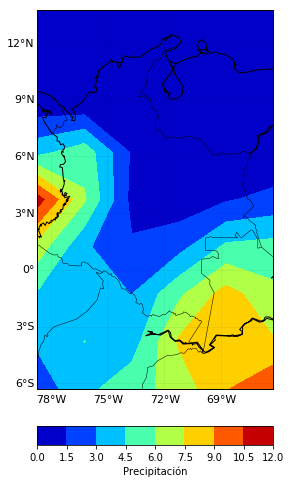

In [49]:
lat_Colombia = lat_values[lat]
lon_Colombia = lon_values[lon]

fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)

# Basemap es el paquete que dibuja las líneas del mapa
m   = Basemap(llcrnrlat=np.min(lat_Colombia),urcrnrlat=np.max(lat_Colombia), \
              llcrnrlon=np.min(lon_Colombia),urcrnrlon=np.max(lon_Colombia),\
            rsphere=6371200.,resolution='l',area_thresh=10000)

ny  = lat.shape[0]; nx = lon.shape[0]
lons, lats = m.makegrid(nx, ny)
x,y = m(lons, lats)

cs  = m.contourf(x,y,Mapa_Col,cmap='jet')


cbar = m.colorbar(location='bottom',pad="10%")
cbar.set_label(u'Precipitación')

m.drawparallels(np.arange(-90.,90,3.), labels=[1,0,0,0], size=11,\
                linewidth=0.1)
m.drawmeridians(np.arange(0, 360, 3.),labels=[0,1,0,1], size=11, \
                linewidth=0.1)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()

## Serie de tiempo sobre un pixel en  colombia 

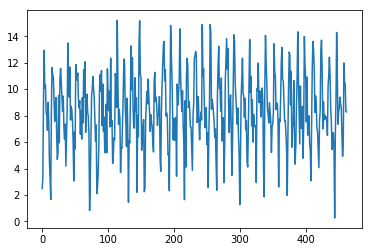

In [53]:
plt.plot(Colombia_Final[:,3,3])